In [527]:
import numpy as np
import pandas
import sklearn

# import data from csv
dataframe = pandas.read_csv('Scoring.csv',usecols = range(0,19), engine='python')
X = dataframe.values

# Initialize Dictionaries and Lists
players2008 = {}
players2009 = {}
players2010 = {}
players2011 = {}
players_2008 = []
players_2009 = []
players_2010 = []
players_2011 = []

#Find players who have played in 2008-2011 seasons at least half of the season
for i in X:
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2008) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2008:
            players2008[i[0]] += 1
        else:
            players2008[i[0]] = 1
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2009) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2009:
            players2009[i[0]] += 1
        else:
            players2009[i[0]] = 1
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2010) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2010:
            players2010[i[0]] += 1
        else:
            players2010[i[0]] = 1
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2011) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2011:
            players2011[i[0]] += 1
        else:
            players2011[i[0]] = 1


# Remove players who have multiple team appearances in a season
for i in players2008.keys():
    if players2008[i] > 1:
        del players2008[i]
for i in players2009.keys():
    if players2009[i] > 1:
        del players2009[i]
for i in players2010.keys():
    if players2010[i] > 1:
        del players2010[i]
for i in players2011.keys():
    if players2011[i] > 1:
        del players2011[i]     

#Add players to lists if they have played in all three seasons
for i in X:
    if ((i[0] in players2008) and (i[0] in players2009) and (i[0] in players2010) and (i[0] in players2011)) and (i[6]>41 and i[6] != 'nan'):
        if (i[1] == 2008):
            players_2008.append(i)
        if (i[1] == 2009):
            players_2009.append(i)
        if (i[1] == 2010):
            players_2010.append(i)
        if (i[1] == 2011):
            players_2011.append(i)


In [550]:
print players_2010[25]

['horcosh01' 2010 1 'EDM' 'NHL' 'C' 47.0 9.0 18.0 27.0 46.0 -1.0 5.0 5.0
 0.0 1.0 1.0 nan 78.0]


In [539]:
X_2008 = []
X_2009 = []
X_2010 = []
X_2011 = []

for i in players_2008:
    X_2008.append(i[6:19])
X_2008 = np.delete(X_2008,[3,4,5,8,9,10,11],1)

for i in players_2009:
    X_2009.append(i[6:19])
X_2009 = np.delete(X_2009,[3,4,5,8,9,10,11],1)

for i in players_2010:
    X_2010.append(i[6:19])
X_2010 = np.delete(X_2010,[3,4,5,8,9,10,11],1)

for i in players_2011:
    X_2011.append(i[6:19])
X_2011 = np.delete(X_2011,[3,4,5,8,9,10,11],1)

# Calculate target data from 2009
Y_2009 = []

for players in players_2009:
    Y_2009.append((players[7]*6/players[6])+(players[8]*4/players[6])+(players[18]/players[6])+((players[12]+players[13])/players[6]))

# Calculate target data from 2010
Y_2010 = []

for players in players_2010:
    Y_2010.append((players[7]*6/players[6])+(players[8]*4/players[6])+(players[18]/players[6])+((players[12]+players[13])/players[6]))

# Calculate target data from 2011
Y_2011 = []

for players in players_2011:
    Y_2011.append((players[7]*6/players[6])+(players[8]*4/players[6])+(players[18]/players[6])+((players[12]+players[13])/players[6]))

# Calculate fantasy points per game for each category (Goals, Assists, Power Play Goals, Power Play Assists, SOG)
Stats = []
for i in X_2008:
    i[1] = i[1]*6/i[0]
    i[2] = i[2]*4/i[0]
    i[3] = i[3]/i[0]
    i[4] = i[4]/i[0]
    i[5] = i[5]/i[0]
    Stats.append(i)
for i in X_2009:
    i[1] = i[1]*6/i[0]
    i[2] = i[2]*4/i[0]
    i[3] = i[3]/i[0]
    i[4] = i[4]/i[0]
    i[5] = i[5]/i[0]
    Stats.append(i)
Stats = np.delete(Stats,0,1)

Y = Y_2009 + Y_2010
Stats = np.array(Stats)

Sorted_Y = sorted(Y)

#Performance Thresholds
low = Sorted_Y[28]
medium_low = Sorted_Y[58]
medium = Sorted_Y[88]
medium_high = Sorted_Y[118]
high = Sorted_Y[147]

cluster_train_Y = []
for i in Y:
    if i <= low:
        level = 1
        cluster_train_Y.append(level)
    elif (i>low) and (i<=medium_low):
        level = 2
        cluster_train_Y.append(level)
    elif (i>medium_low) and (i<=medium):
        level = 3
        cluster_train_Y.append(level)
    elif (i>medium) and (i<=medium_high):
        level = 4
        cluster_train_Y.append(level)
    elif (i>medium_high):
        level = 5
        cluster_train_Y.append(level)
    else:
        print "not working"

## Find average score of each cluster

low_avg = sum(Sorted_Y[0:29])/29
medium_low_avg = sum(Sorted_Y[29:59])/30
medium_avg = sum(Sorted_Y[59:89])/30
medium_high_avg = sum(Sorted_Y[89:119])/30
high_avg = sum(Sorted_Y[119:148])/29

print low_avg
print medium_low_avg
print medium_avg
print medium_high_avg
print high_avg


# normalize data (X)
Stats = sklearn.preprocessing.normalize(Stats, norm='max', axis=0)
# print Stats[0]
# print Stats[1]
# print Stats[:, 2]

2.5635615061
4.01766352255
5.38634711118
6.54010693611
8.21082670993


In [532]:
## Set up Testing Data

Stats_test = []
for i in X_2010:
    i[1] = i[1]*6/i[0]
    i[2] = i[2]*4/i[0]
    i[3] = i[3]/i[0]
    i[4] = i[4]/i[0]
    i[5] = i[5]/i[0]
    Stats_test.append(i)
Stats_test = np.delete(Stats_test,0,1)
Stats_test = np.array(Stats_test)
Stats_test = sklearn.preprocessing.normalize(Stats_test, norm='max', axis=0)
    
cluster_test_Y = []
for i in Y_2011:
    if i <= low:
        level = 1
        cluster_test_Y.append(level)
    elif (i>low) and (i<=medium_low):
        level = 2
        cluster_test_Y.append(level)
    elif (i>medium_low) and (i<=medium):
        level = 3
        cluster_test_Y.append(level)
    elif (i>medium) and (i<=medium_high):
        level = 4
        cluster_test_Y.append(level)
    elif (i>medium_high):
        level = 5
        cluster_test_Y.append(level)
    else:
        print "not working" 


heres a 5
heres a 5
heres a 5
heres a 5
heres a 5
heres a 5
heres a 5
heres a 5
heres a 5


In [533]:
# Method to calculate the error
def calError(predict, actual):
    error = []
    for i in xrange(len(predict)):
        error.append(abs(predict[i] - actual[i])/actual[i])
    
    total = 0.0
    for i in error:
        total += i
    total = total/len(error)
    return total
        

In [534]:
# SVM
from sklearn.svm import SVC

model_SVM = SVC()
model_SVM.fit(Stats,cluster_train_Y)

predict_train_Y = model_SVM.predict(Stats)
predict_test_Y = model_SVM.predict(Stats_test)

print predict_train_Y
print predict_test_Y

print calError(predict_train_Y,cluster_train_Y) # Train Error
print calError(predict_test_Y,cluster_test_Y)  # Test Error

[5 5 2 2 3 3 1 1 1 5 3 5 2 1 2 1 2 3 2 5 1 3 1 3 1 3 3 4 1 2 3 5 4 4 4 4 5
 2 1 5 1 3 1 3 3 3 1 4 3 1 1 4 5 5 1 4 5 5 5 2 3 3 5 1 2 3 1 1 5 4 3 2 4 1
 4 5 2 3 3 1 1 1 1 5 3 4 3 2 3 1 3 3 1 5 1 2 1 2 1 2 3 3 1 1 5 5 3 5 3 3 5
 2 2 5 1 1 1 2 3 3 1 4 4 1 1 4 5 5 1 5 4 5 5 2 3 5 4 1 3 4 3 1 4 4 3 3 3 1]
[2 4 1 1 3 3 1 1 1 4 3 5 3 2 3 1 3 3 1 5 2 3 1 1 3 5 3 3 1 3 5 4 3 4 3 2 5
 2 1 5 1 1 1 2 5 1 1 5 3 1 1 3 5 3 1 4 5 5 5 5 1 5 4 1 3 2 1 1 4 4 3 2 3 1]
0.0405405405405
0.0675675675676


15
14
7
2
2
2
Total Errors:
8
6


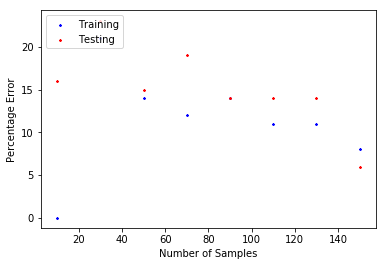

In [526]:
## K-Fold Validation
import math
import matplotlib.pyplot as plt
from sklearn.svm import SVC

Training_Error = []
Testing_Error = []

# Stats = Stats[0:10]
# cluster_train_Y = cluster_train_Y[0:10]

## 1/3 of 148 players
test_size = 48
train_size = 50

train_X_1 = Stats[0:train_size]
train_X_2 = Stats[train_size:2*train_size]
test_X = Stats[len(Stats)-test_size:len(Stats)]

train_Y_1 = cluster_train_Y[0:train_size]
train_Y_2 = cluster_train_Y[train_size:2*train_size]
test_Y = cluster_train_Y[len(cluster_train_Y)-test_size:len(cluster_train_Y)]

training_X = []
for i in train_X_1:
    training_X.append(i)
for i in train_X_2:
    training_X.append(i)
    
training_Y = []
for i in train_Y_1:
    training_Y.append(i)
for i in train_Y_2:
    training_Y.append(i)

model_SVM = SVC()
model_SVM.fit(training_X,training_Y)

predict_train_Y = model_SVM.predict(training_X)
predict_test_Y = model_SVM.predict(test_X)
pred_train = predict_train_Y
pred_test = predict_test_Y

# Training error
err_train = (abs(pred_train - training_Y)/training_Y) * 100

ttl_train = sum(err_train)/len(err_train)

Training_Error.append(ttl_train)

print ttl_train

# Testing error
err_test = (abs(pred_test - test_Y)/test_Y) * 100

ttl_test = sum(err_test)/len(err_test)

Testing_Error.append(ttl_test)

print ttl_test


######################### 2nd fold
train_X_1 = train_X_2
train_X_2 = test_X
test_X = train_X_1

train_Y_1 = train_Y_2
train_Y_2 = test_Y
test_Y = train_Y_1

training_X = []
for i in train_X_1:
    training_X.append(i)
for i in train_X_2:
    training_X.append(i)

training_Y = []
for i in train_Y_1:
    training_Y.append(i)
for i in train_Y_2:
    training_Y.append(i)

model_SVM = SVC()
model_SVM.fit(training_X,training_Y)

predict_train_Y = model_SVM.predict(training_X)
predict_test_Y = model_SVM.predict(test_X)
pred_train = predict_train_Y
pred_test = predict_test_Y

# Training error
err_train = (abs(pred_train - training_Y)/training_Y) * 100

ttl_train = sum(err_train)/len(err_train)

Training_Error.append(ttl_train)
print ttl_train

# Testing error
err_test = (abs(pred_test - test_Y)/test_Y) * 100

ttl_test = sum(err_test)/len(err_test)

Testing_Error.append(ttl_test)
print ttl_test

######################### 3rd fold
train_X_1 = test_X
train_X_2 = train_X_1
test_X = train_X_2

train_Y_1 = test_Y
train_Y_2 = train_Y_1
test_Y = train_Y_2

training_X = []
for i in train_X_1:
    training_X.append(i)
for i in train_X_2:
    training_X.append(i)

training_Y = []
for i in train_Y_1:
    training_Y.append(i)
for i in train_Y_2:
    training_Y.append(i)


model_SVM = SVC()
model_SVM.fit(training_X,training_Y)

predict_train_Y = model_SVM.predict(training_X)
predict_test_Y = model_SVM.predict(test_X)
pred_train = predict_train_Y
pred_test = predict_test_Y

# Training error
err_train = (abs(pred_train - training_Y)/training_Y) * 100

ttl_train = sum(err_train)/len(err_train)

Training_Error.append(ttl_train)
print ttl_train

# Testing error
err_test = (abs(pred_test - test_Y)/test_Y) * 100

ttl_test = sum(err_test)/len(err_test)

Testing_Error.append(ttl_test)
print ttl_test

print "Total Errors:"
print sum(Training_Error)/len(Training_Error)
print sum(Testing_Error)/len(Testing_Error)


## Plot Error against Samples (KFold was repeated for different sizes of X_2008)

samples = [10,30,50,70,90,110,130,150]
kfold_training_errors = [0, 21,14,12,14,11,11,8]
kfold_testing_errors = [16,23,15,19,14,14,14,6]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(samples, kfold_training_errors, s=4, c='b', marker="*", label='Training')
ax1.scatter(samples, kfold_testing_errors, s=4, c='r', marker="*", label='Testing')
plt.legend(loc='upper left');
plt.xlabel('Number of Samples')
plt.ylabel('Percentage Error')
plt.show()

In [500]:
## Convert back to fantasy points

points_predict_train_Y = []
for i in predict_train_Y:
    if i == 1:
        points = low_avg
        points_predict_train_Y.append(points)
    elif i == 2:
        points = medium_low_avg
        points_predict_train_Y.append(points)
    elif i == 3:
        points = medium_avg
        points_predict_train_Y.append(points)
    elif i == 4:
        points = medium_high_avg
        points_predict_train_Y.append(points)
    elif i == 5:
        points = high_avg
        points_predict_train_Y.append(points)
    else:
        print "not working"

points_predict_test_Y = []
for i in predict_test_Y:
    if i == 1:
        points = low_avg
        points_predict_test_Y.append(points)
    elif i == 2:
        points = medium_low_avg
        points_predict_test_Y.append(points)
    elif i == 3:
        points = medium_avg
        points_predict_test_Y.append(points)
    elif i == 4:
        points = medium_high_avg
        points_predict_test_Y.append(points)
    elif i == 5:
        points = high_avg
        points_predict_test_Y.append(points)
    else:
        print "not working"
        
print calError(points_predict_train_Y,Y) # Train Error
print calError(points_predict_test_Y,Y_2011)  # Test Error

0.203615210314
0.254286216578


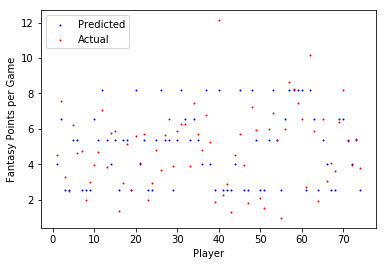

In [501]:
import matplotlib.pyplot as plt

x_axis = range(1,len(points_predict_test_Y)+1)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x_axis, points_predict_test_Y, s=1, c='b', marker="o", label='Predicted')
ax1.scatter(x_axis, Y_2011, s=1, c='r', marker="o", label='Actual')
plt.legend(loc='upper left');
plt.xlabel('Player')
plt.ylabel('Fantasy Points per Game')
plt.show()

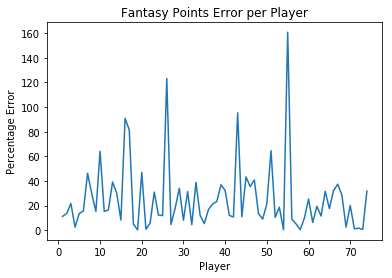

In [505]:
error = []
for i in xrange(len(points_predict_test_Y)):
    error.append(abs((points_predict_test_Y[i] - Y_2011[i])/Y_2011[i])*100)
    
plt.plot(x_axis, error)
plt.xlabel('Player')
plt.ylabel('Percentage Error')
plt.title('Fantasy Points Error per Player')
plt.show()

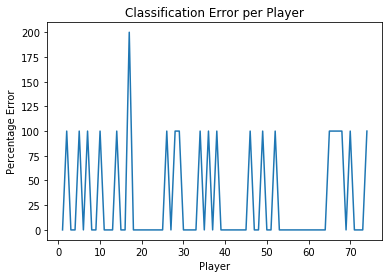

In [504]:
error = []
for i in xrange(len(predict_test_Y)):
    error.append(abs((predict_test_Y[i] - cluster_test_Y[i])/cluster_test_Y[i])*100)
    
plt.plot(x_axis, error)
plt.xlabel('Player')
plt.ylabel('Percentage Error')
plt.title('Classification Error per Player')
plt.show()